In [1]:
!pip install tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8 MB 4.9 kB/s 
     |████████████████████████████████| 3.8 MB 45.6 MB/s 
     |████████████████████████████████| 448 kB 55.4 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=c4e1de87db9ec6c291c0e7eae0d7e6642dda9d3ebbc40ae978e5f1e425f39d55
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succe

In [2]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

In [3]:
tf.__version__

'2.1.0'

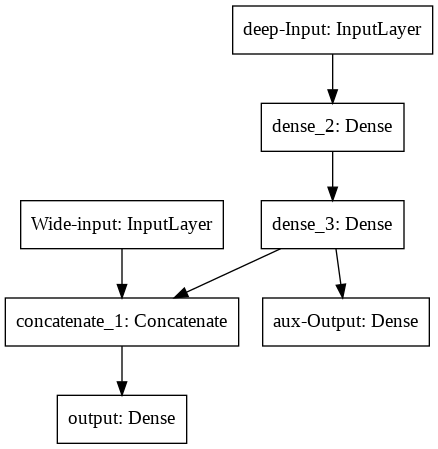

In [6]:
#Model in simple coding 

input_a = Input(shape=[1], name="Wide-input")
input_b = Input(shape=[1], name="deep-Input")

dense_1 = Dense(30, activation="relu")(input_b)
dense_2 = Dense(30, activation="relu")(dense_1) 

concat = concatenate([input_a, dense_2])

output = Dense(1, name="output")(concat)

aux_output = Dense(1, name="aux-Output")(dense_2)

model = Model(inputs = [input_a, input_b], outputs=[output, aux_output])

plot_model(model)

<h2>Class</h2>

In [13]:
class WideandDeepModel(Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden1=Dense(30, activation=activation)
    self.hidden2=Dense(30, activation=activation)
    self.main_output=Dense(1) 
    self.aux_output = Dense(1)  

  def call(self, inputs):
    input_A, input_B = inputs  

    hidden1 = self.hidden1(input_B) 

    hidden2 = self.hidden2(hidden1) 

    concat = concatenate([input_A, hidden2]) 

    main_output = self.main_output(concat) 
    aux_output = self.aux_output(hidden2) 

    return main_output, aux_output

In [15]:
model = WideandDeepModel()